<a href="https://colab.research.google.com/github/cmason30/python-practice/blob/master/k_nearest_neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
uploaded = files.upload()

Saving Classified Data to Classified Data (1)


In [11]:
import pandas as pd
import numpy as np

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df = pd.read_csv('Classified Data')

In [14]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(df.drop('TARGET CLASS', axis=1))
# Only fit my data, dont need to use target class column

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [ ]:
scaled_features

In [22]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [ ]:
df_feat.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [27]:
X = df_feat
y= df['TARGET CLASS']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=1)

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [32]:
pred = knn.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

In [36]:
error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

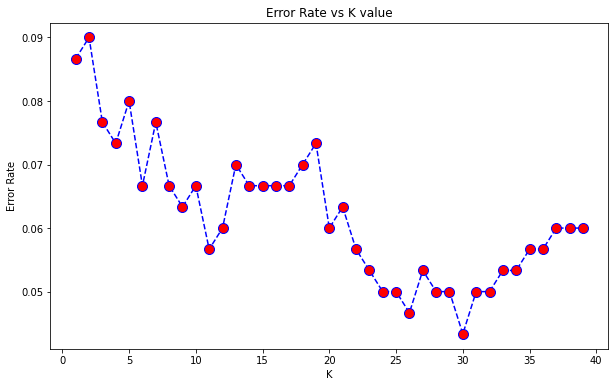

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[153   6]
 [  8 133]]


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [41]:
print(pred)

[0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0
 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1
 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1
 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0
 1 1 1 0]
